In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
from tensorflow.python.framework.func_graph import flatten
# from tensorflow.python.ops.gen_nn_ops import Conv2D
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3, verbose=2, batch_size=32)

Epoch 1/3
1875/1875 - 62s - loss: 0.3123 - accuracy: 0.8852 - 62s/epoch - 33ms/step
Epoch 2/3
1875/1875 - 54s - loss: 0.2647 - accuracy: 0.9033 - 54s/epoch - 29ms/step
Epoch 3/3
1875/1875 - 56s - loss: 0.2354 - accuracy: 0.9126 - 56s/epoch - 30ms/step


In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2790 - accuracy: 0.8983


In [ ]:
indices = np.random.randint(0, len(y_test), 5)
indices

array([5648, 6570, 3777, 5407, 4856])

In [ ]:
sample_img = x_test[indices]
sample_lbl = y_test[indices]

In [ ]:
pred = model.predict(sample_img)

1/1 [==============================] - 0s 126ms/step


In [ ]:
pred_lbl = np.argmax(pred, axis=1)

In [ ]:
pred_lbl

array([2, 1, 4, 5, 7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
pred_class_name = [class_names[lbl] for lbl in pred_lbl]

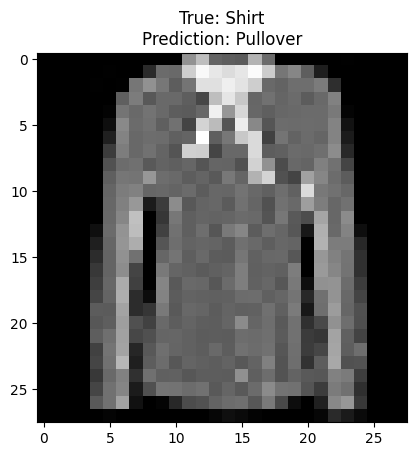

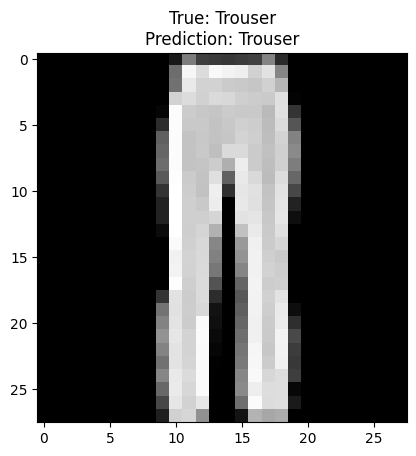

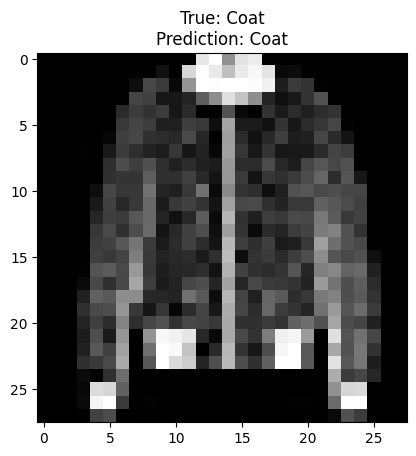

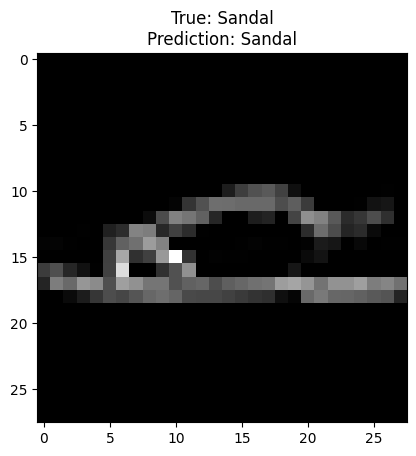

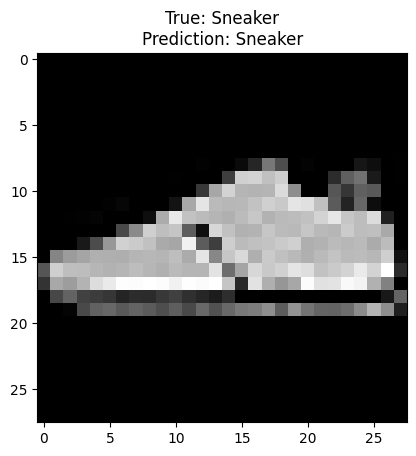

In [ ]:
for i in range(len(sample_img)):
    plt.imshow(sample_img[i].reshape(28,28), cmap='gray')
    plt.title(f'True: {class_names[sample_lbl[i]]}\nPrediction: {pred_class_name[i]}')
    plt.show()